# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр


## Задание 1

1.Загрузите датасет music_genre.csv.

2.Возьмите 20 тысяч случайных строк из датасета (все остальные задания выполняйте для этих 20 тысяч строк!!!)

3.Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.

4.Проверьте, есть ли а датасете строки, в которых значение в столбце artist_name – empty_field. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
#1
contents <- read.csv("/content/music_genre.csv", header=TRUE)

In [ ]:
#2
dataset <- contents[sample(nrow(contents), 20000),]

In [ ]:
#3
print(dataset[duplicated(dataset),][0])
dt <- unique(dataset)
print(dt[duplicated(dt),][0])

data frame with 0 columns and 1 row
data frame with 0 columns and 0 rows


In [ ]:
#4
nrow(dt[dt$artist_name == 'empty_field',])
dt <- dt[!dt$artist_name == 'empty_field',]
nrow(dt[dt$artist_name == 'empty_field',])

[1] 1016

[1] 0

## Задание 2

1.Выведите долю каждого жанра в датасете.

2.Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

3.Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.

4.Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [ ]:
#1
prop.table(table(dt$music_genre))*100


            Alternative       Anime       Blues   Classical     Country 
 0.00500025  9.75048752 10.11050553  9.96049802  9.86049302  9.94049702 
 Electronic     Hip-Hop        Jazz         Rap        Rock 
10.44052203 10.07050353 10.14050703  9.77548877  9.94549727 

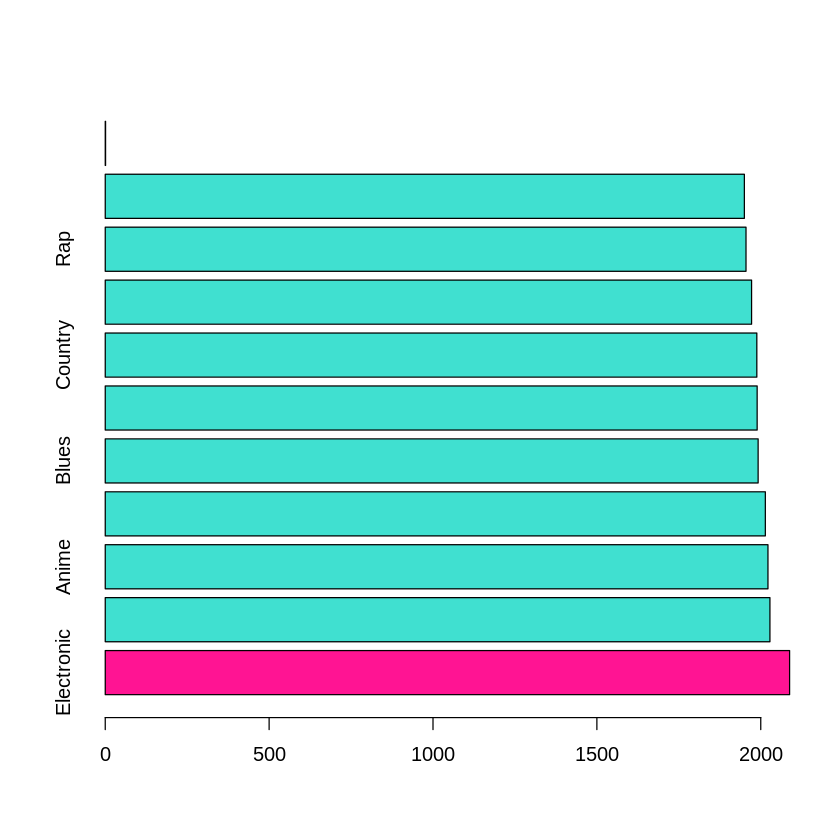

In [ ]:
#2
table <- table(dt$music_genre)
cols <- c("turquoise", "deeppink")[1+(table==max(table))]
sorted_table <- sort(table, decreasing = TRUE)
barplot(sorted_table, col=cols[order(table, decreasing = TRUE)], horiz=TRUE)


In [ ]:
#3
dance <- aggregate(dt$danceability, by=list(Genre=dt$music_genre), FUN=mean)
dance[]

Genre,x
<chr>,<dbl>
,NA
Alternative,0.5406964
Anime,0.4723976
Blues,0.5253635
Classical,0.3048503
Country,0.5802847
Electronic,0.6206711
Hip-Hop,0.7183575
Jazz,0.5872894


In [ ]:
#4
genres <- unique(dataset$music_genre)
genres <- genres[genres != ""]

min_maj <- vector(mode = "character", length = length(genres))
amount <- vector(mode = "integer", length = length(genres))

for (i in seq_along(genres)) {
  genre <- genres[i]
  subset_dataset <- subset(dataset, music_genre == genre)
  
  amount_major <- sum(subset_dataset$mode == 'Major', na.rm = TRUE)
  amount_minor <- sum(subset_dataset$mode == 'Minor', na.rm = TRUE)
  
  min_maj[i] <- ifelse(amount_major > amount_minor, "Major", "Minor")
  amount[i] <- ifelse(amount_major > amount_minor, amount_major, amount_minor)
}

dataset_n <- data.frame(genre = as.character(genres), mode = as.character(min_maj), amount = as.numeric(amount))
dataset_n

genre,mode,amount
<chr>,<chr>,<dbl>
Blues,Major,1440
Electronic,Major,1131
Anime,Major,1247
Rock,Major,1468
Rap,Major,1084
Hip-Hop,Major,1094
Classical,Major,1341
Country,Major,1728
Jazz,Major,1045


## Задание 3.

1.Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.

2.Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [ ]:
#1
artists <- unique(dataset$artist_name)
amount_of_tracks <- sapply(artists, function(artist) {
  nrow(dataset[dataset$artist_name == artist, ])
})
new_dataframe <- data.frame(artist = artists, amount = amount_of_tracks)
new_dataframe$amount <- as.numeric(as.character(new_dataframe$amount))
print(new_dataframe[which.max(new_dataframe$amount), ])
print(new_dataframe[which.min(new_dataframe$amount), ])

                 artist amount
empty_field empty_field   1004
                     artist amount
Pēteris Vasks Pēteris Vasks      1


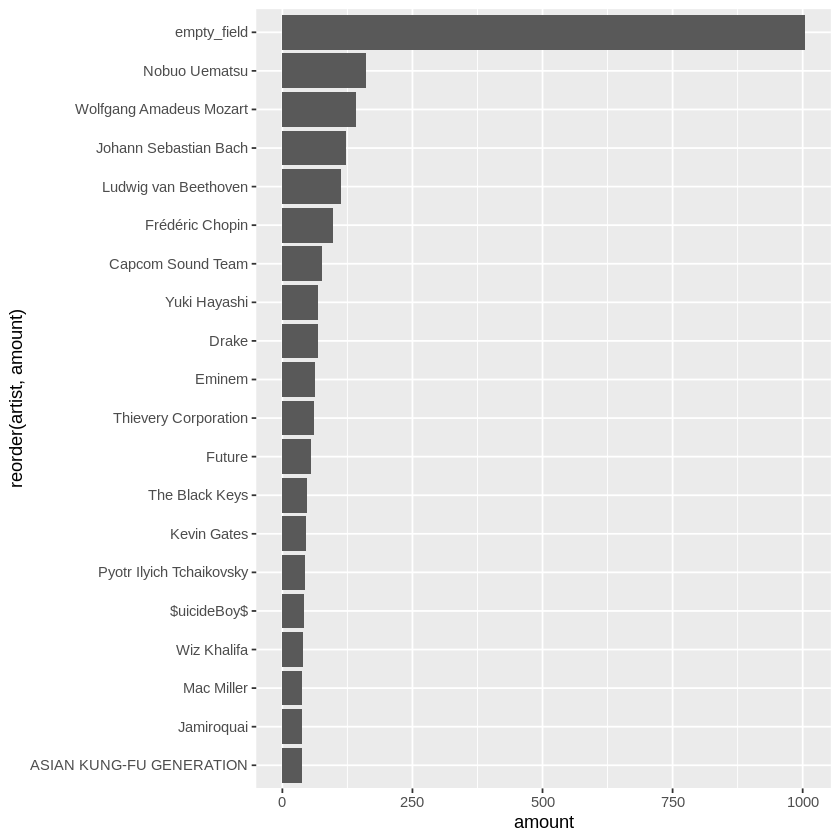

In [ ]:
#2
library(dplyr)
library(ggplot2)

new_dataframe <- arrange(new_dataframe, desc(amount)) %>%
  head(20)

ggplot(new_dataframe, aes(x = reorder(artist, amount), y = amount)) +
  geom_col() +
  coord_flip()

## Задание 4

1.Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.

2.Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [ ]:
#1
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



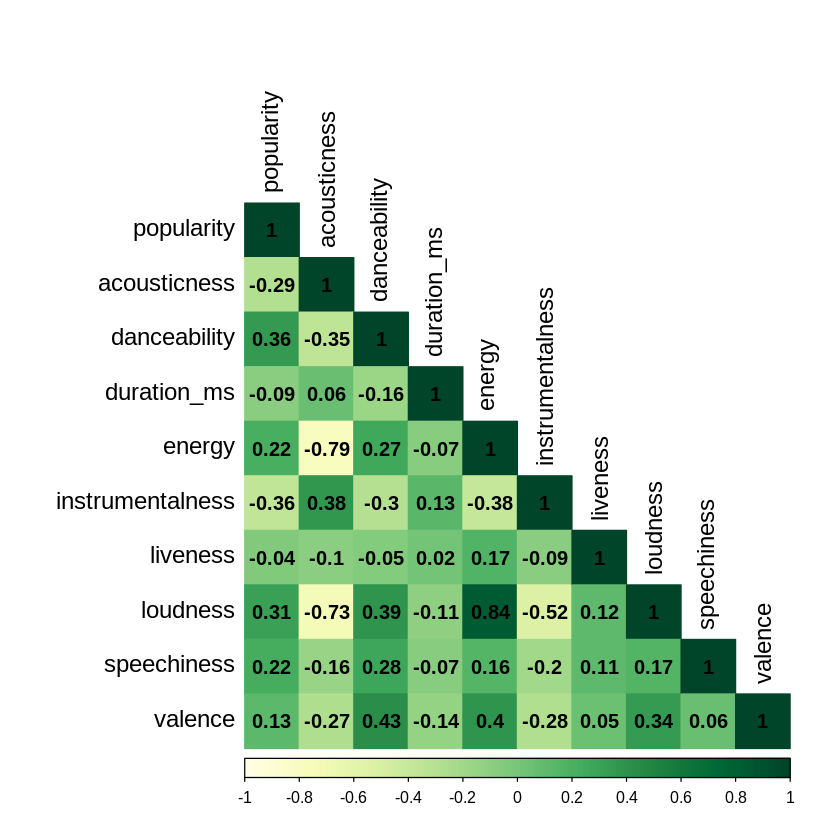

In [108]:
#2
library(dplyr)
library(tidyr)
library(corrplot)

selected_cols <- c("popularity", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")

dataset_clean <- dataset %>%
  select(selected_cols) %>%
  drop_na() %>%
  mutate_all(as.numeric)

correlation_matrix <- cor(dataset_clean)

corrplot(correlation_matrix, addCoef.col = 'black', method = "color", type = "lower", tl.col = "black", col = COL1('YlGn'), tl.cex = 1.2)

## Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette YlGn is 9
Returning the palette you asked for with that many colors
”


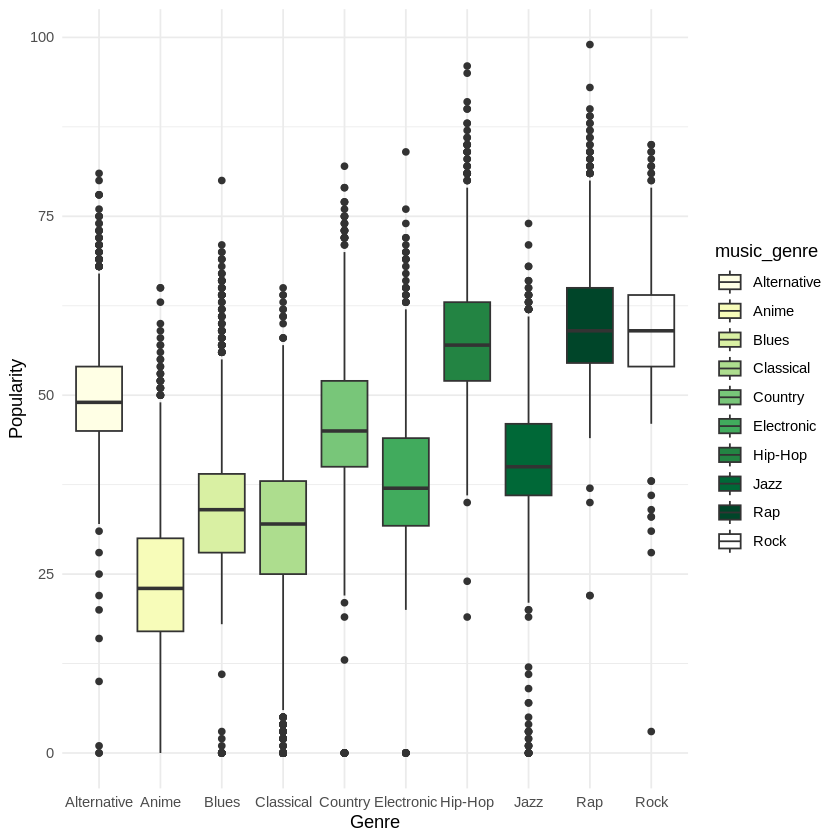

In [ ]:
library(dplyr)
library(ggplot2)

dataset_popularity <- dataset %>%
  select(popularity, music_genre) %>%
  mutate(popularity = as.numeric(popularity)) %>%
  drop_na() %>%
  mutate(music_genre = factor(music_genre))

ggplot(dataset_popularity, aes(x = music_genre, y = popularity, fill = music_genre)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "YlGn") +
  labs(x = "Genre", y = "Popularity") +
  theme_minimal()

# Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. 
Отрицательные и положительные значения характеристик показывайте разными цветами.

In [ ]:
genre_popularity <- tapply(dataset$popularity, dataset$music_genre, mean)
dataset_popularity <- data.frame(genre = names(genre_popularity), popularity = genre_popularity)

dataset_popularity$genre <- as.character(dataset_popularity$genre)
dataset_popularity$popularity <- as.numeric(dataset_popularity$popularity)

min_genre <- dataset_popularity$genre[which.min(dataset_popularity$popularity)]
max_genre <- dataset_popularity$genre[which.max(dataset_popularity$popularity)]

minmax_cols <- c("acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence")

dataset_min <- dataset[dataset$music_genre == min_genre, minmax_cols, drop = FALSE]
min_means <- colMeans(dataset_min, na.rm = TRUE)

dataset_max <- dataset[dataset$music_genre == max_genre, minmax_cols, drop = FALSE]
max_means <- colMeans(dataset_max, na.rm = TRUE)

print(max_means)

    acousticness     danceability           energy instrumentalness 
     0.166080016      0.696335038      0.653041944      0.009720407 
        liveness         loudness      speechiness          valence 
     0.198833043     -6.603200000      0.187174527      0.455364655 


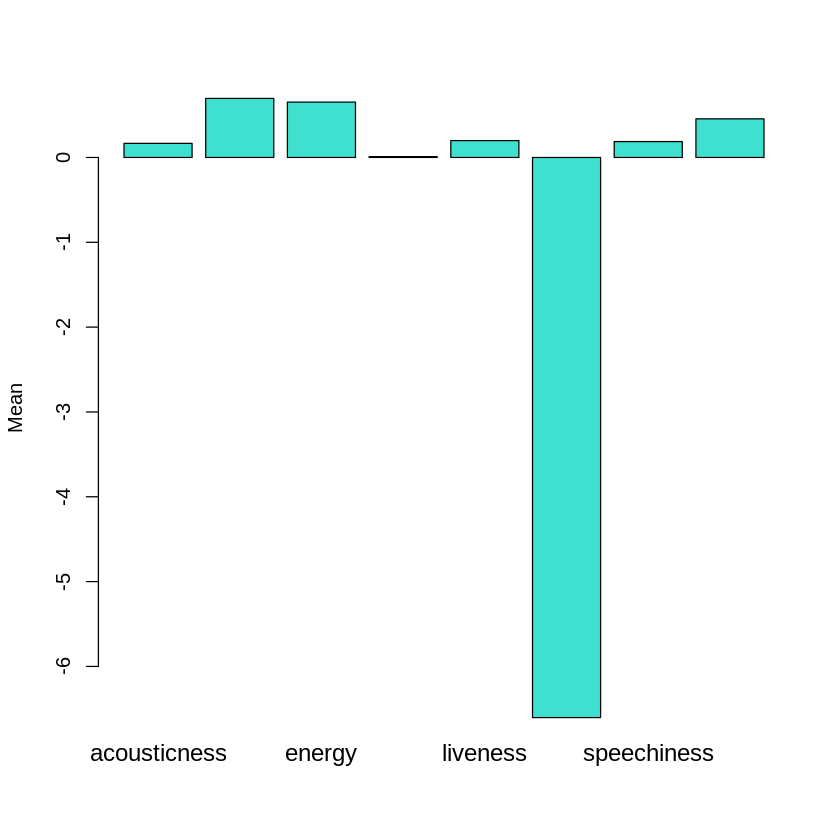

In [ ]:
barplot(max_means, 
        ylab = "Mean",
        col = "turquoise",
        cex.names = 1.2)

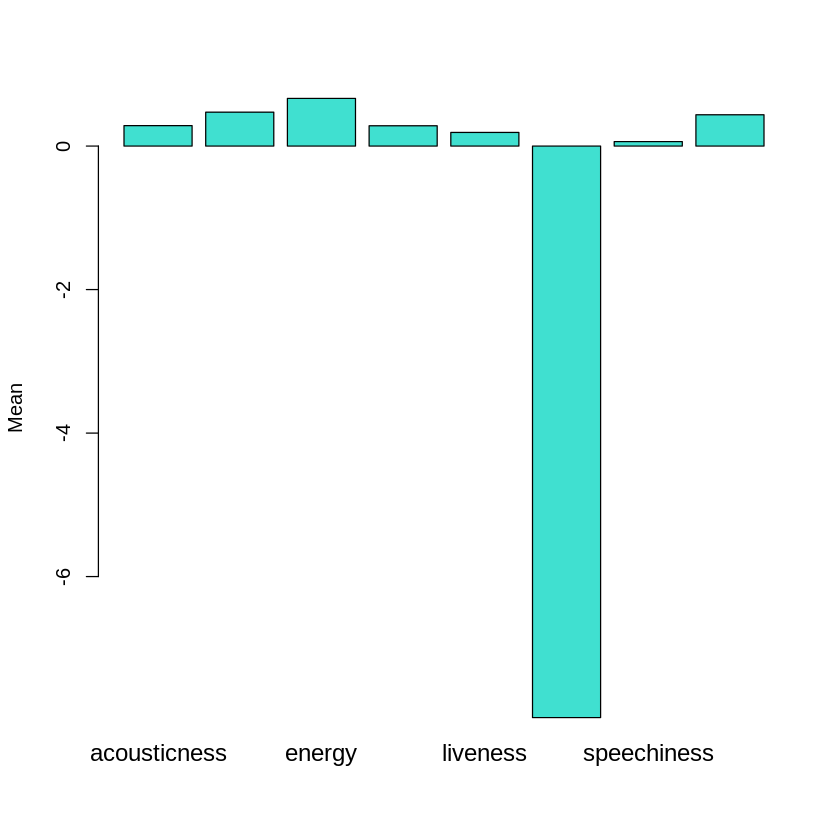

In [ ]:
barplot(min_means, 
        ylab = "Mean",
        col = "turquoise",
        cex.names = 1.2)

## Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме покажите численное соотношение треков разной длительности.


Warning message:
“Removed 2 rows containing non-finite values (`stat_density()`).”


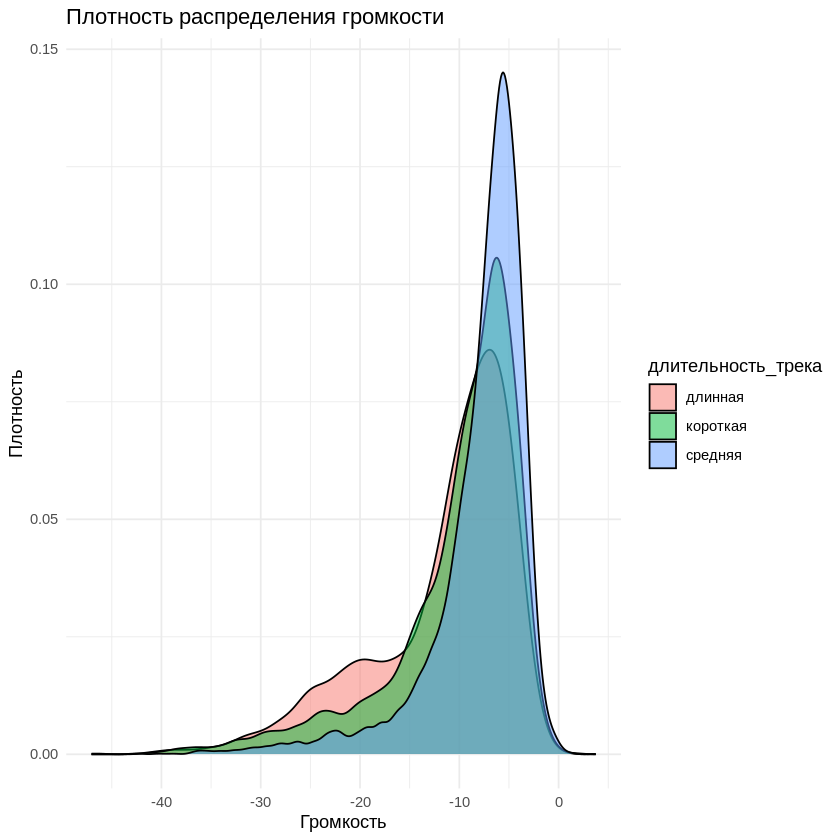

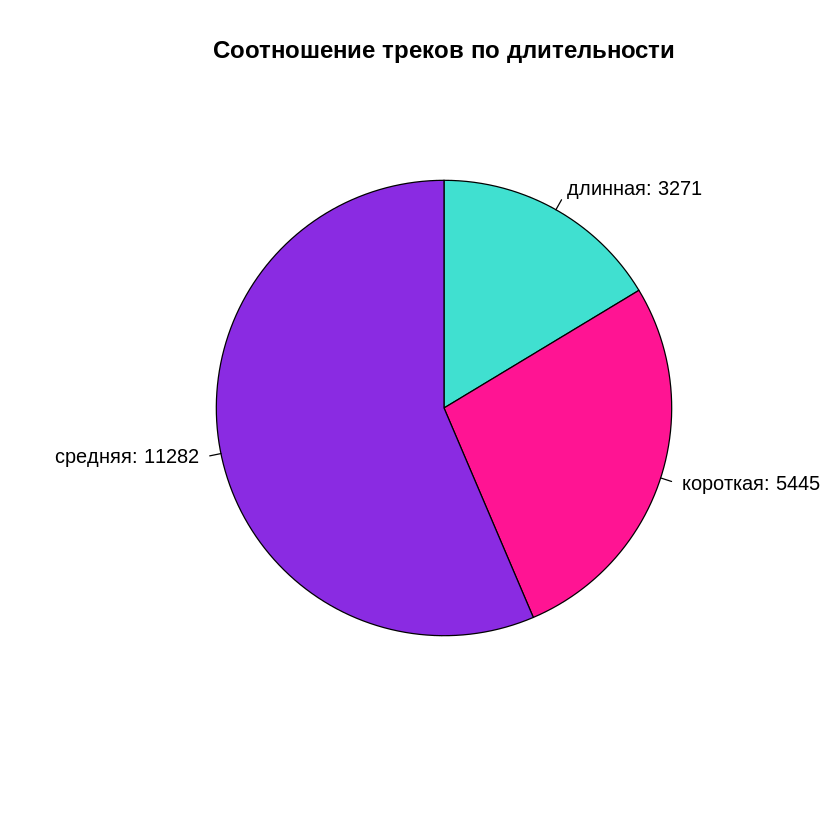

In [ ]:
library(ggplot2)
dataset$длительность_трека <- ifelse(dataset$duration_ms <= 3*60*1000, "короткая",
                          ifelse(dataset$duration_ms > 3*60*1000 & dataset$duration_ms <= 5*60*1000, "средняя", "длинная"))

ggplot(dataset, aes(x = loudness, fill = длительность_трека)) +
  geom_density(alpha = 0.5) +
  ggtitle("Плотность распределения громкости") +
  xlab("Громкость") +
  ylab("Плотность") +
  theme_minimal()

duration_table <- table(dataset$длительность_трека)

circle_labels <- paste0(names(duration_table), ": ", duration_table)
circle_colors <- c("turquoise", "deeppink", "blueviolet")

pie(duration_table, labels = circle_labels, col = circle_colors, main = "Соотношение треков по длительности", clockwise = TRUE, init.angle = 90)
